In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

## Load Train and Test Datasets

In [2]:
# Load training data
df_train = pd.read_csv('../../0_Datasets/NSL-KDD/train.csv')

In [3]:
# Load testing data
df_test = pd.read_csv('../../0_Datasets/NSL-KDD/test.csv')

In [4]:
X_train = df_train.drop(['binary_attack'], axis=1)  # Features
y_train = df_train['binary_attack']  # Target variable

In [5]:
X_test = df_test.drop(['binary_attack'], axis=1)  # Features
y_test = df_test['binary_attack']  # Target variable

## Load Model

In [6]:
from tensorflow.keras.models import load_model

model = load_model('../../2_Modeling_Phase/Saved_Models/NSL-KDD_DNN.keras')

2024-05-07 16:38:40.122677: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 16:38:40.123656: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 16:38:40.160191: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 16:38:40.297633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 16:38:41.027264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

---

## Feature Importance

In [7]:
feature_names = df_train.columns
feature_names = feature_names[:-1]

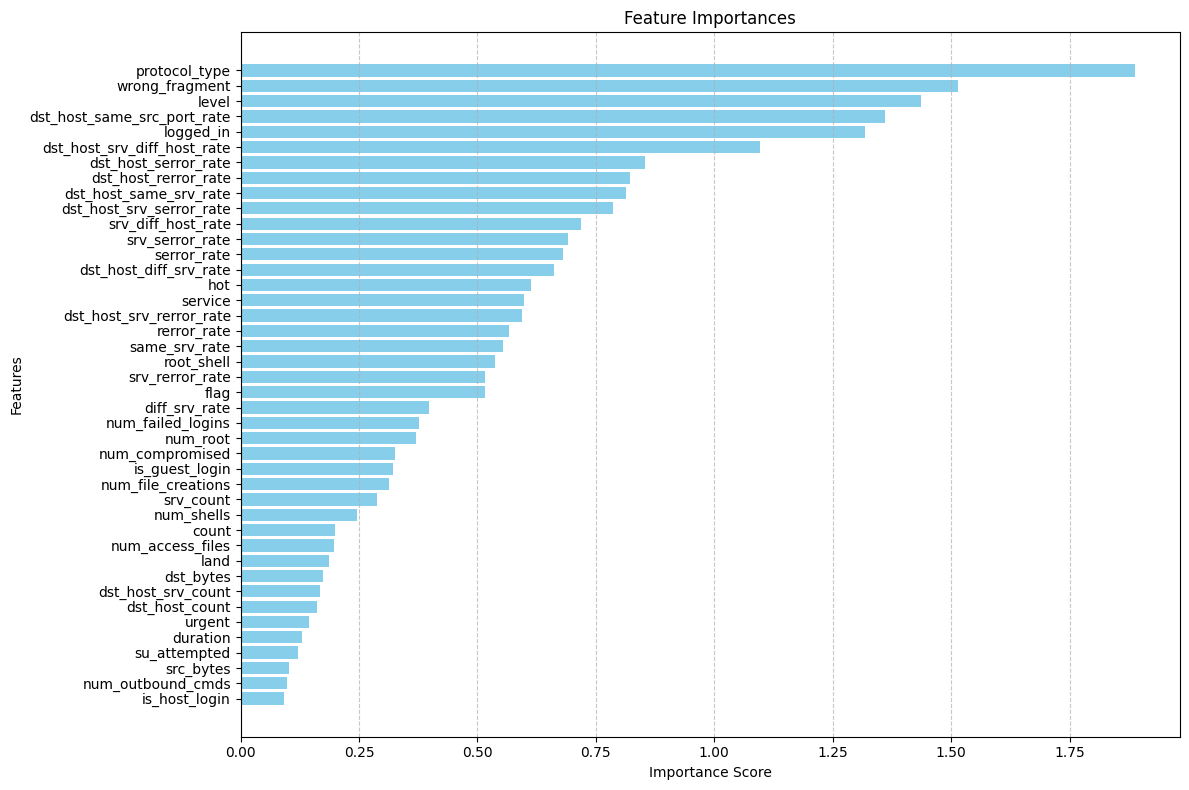

In [8]:
weights = model.get_weights()

input_layer_weights = weights[0]

importances = np.mean(np.abs(input_layer_weights), axis=1)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bar plot
ax.barh(range(X_train.shape[1]), importances[indices], color="skyblue")

# Set y-axis labels
ax.set_yticks(range(X_train.shape[1]))
ax.set_yticklabels(feature_names[indices])

# Set title and labels
ax.set_title("Feature Importances")
ax.set_xlabel("Importance Score")
ax.set_ylabel("Features")

# Invert y-axis for better readability
ax.invert_yaxis()

# Add grid for better visualization
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
def calculate_feature_importance(model, feature_names):
    """
    Calculate feature importance using Gini index.

    Returns:
    - DataFrame: DataFrame containing feature names and their corresponding Gini importance.
    """
    # Create DataFrame to hold feature names
    dfp_importance = pd.DataFrame({'feat_names': feature_names})
    dfp_importance['feature'] = dfp_importance.index.astype(str)  

    # Create DataFrame to hold Gini importance
    dfp_importance_gini = pd.DataFrame({'importance_gini': importances})
    dfp_importance_gini['feature'] = dfp_importance_gini.index.astype(str)  

    # Calculate percentile rank of Gini importance
    dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)

    # Merge DataFrames and sort by importance
    dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
    dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
    
    return dfp_importance

%time importance_table = calculate_feature_importance(model, feature_names)
importance_table

CPU times: user 3.71 ms, sys: 0 ns, total: 3.71 ms
Wall time: 3.45 ms


,feat_names,feature,importance_gini,importance_gini_pct
0,protocol_type,1,1.888846,1.000000
1,wrong_fragment,7,1.514872,0.976190
2,level,41,1.436195,0.952381
3,dst_host_same_src_port_rate,35,1.359946,0.928571
4,logged_in,11,1.319153,0.904762
5,dst_host_srv_diff_host_rate,36,1.095495,0.880952
6,dst_host_serror_rate,37,0.853666,0.857143
7,dst_host_rerror_rate,39,0.821150,0.833333
8,dst_host_same_srv_rate,33,0.812779,0.809524
9,dst_host_srv_serror_rate,38,0.785492,0.785714


## Shap

In [ ]:
import shap

def visualize_shap_summary_plot(model, X_test, feature_names=None, class_names=None):
    """
    Visualize SHAP summary plot for interpreting model predictions.
    """
    masker = shap.maskers.Independent(X_test)
    
    # Create a SHAP explainer for the model
    explainer = shap.Explainer(model, masker=masker)  

    # Calculate SHAP values for the test dataset
    shap_values = explainer.shap_values(X_test)

    # Visualize the SHAP summary plot
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, class_names=class_names)

%time visualize_shap_summary_plot(model, X_test, feature_names=feature_names, class_names=['Normal', 'Malicious'])

PermutationExplainer explainer:  99%|████████████████████████▊| 22393/22544 [25:59<00:11, 13.23it/s]

## InterpretML

In [ ]:
import tensorflow as tf
tf.experimental.numpy.experimental_enable_numpy_behavior()

from interpret.blackbox import MorrisSensitivity
from sklearn.pipeline import Pipeline
from interpret import show

%time msa = MorrisSensitivity(model, X_test,feature_names=feature_names)

show(msa.explain_global())

## LOFO

In [ ]:
from lofo import LOFOImportance, Dataset
from sklearn.model_selection import KFold
import pandas as pd

def calculate_lofo_importance(df, target_column, feature_names, cv_splits=4, scoring="roc_auc"):
    """
    Calculate LOFO (Leave One Feature Out) importance using the specified validation scheme and scorer.
    """
    cv = KFold(n_splits=cv_splits, shuffle=False, random_state=None) # Don't shuffle to keep the time split validation

    # Define the dataset
    dataset = Dataset(df=df, target=target_column, features=feature_names)

    # Define the LOFOImportance object
    lofo_imp = LOFOImportance(dataset, cv=cv, scoring=scoring)

    # Get the mean and standard deviation of the importances in pandas format
    importance = lofo_imp.get_importance()
    
    return importance

%time importance = calculate_lofo_importance(df=df_test, target_column="binary_attack", feature_names=feature_names)

importance